#### import libraries

In [1]:
import numpy as np
from typing import Tuple, Dict

#### generating data for our xnor problem

In [2]:
def generate_data(N: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Original code credits to Prof. Dr. Stefan Harmeling
    
    Generate a data for training our linear model.
    :param N: number of samples multiplier.
    :return: tuple of x and y data as numpy ndarrays.
    """
    X = np.repeat(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), N, axis=0)
    X = X + np.random.randn(4 * N, 2) * 0.2
    y = np.repeat([0, 1, 0, 1], N)
    y = np.reshape(y, (len(y), 1))

    return X, y

In [3]:
X_train, y_train = generate_data(N=100)
X_test, y_test = generate_data(N=50)

#### extra code
to plot data we just created

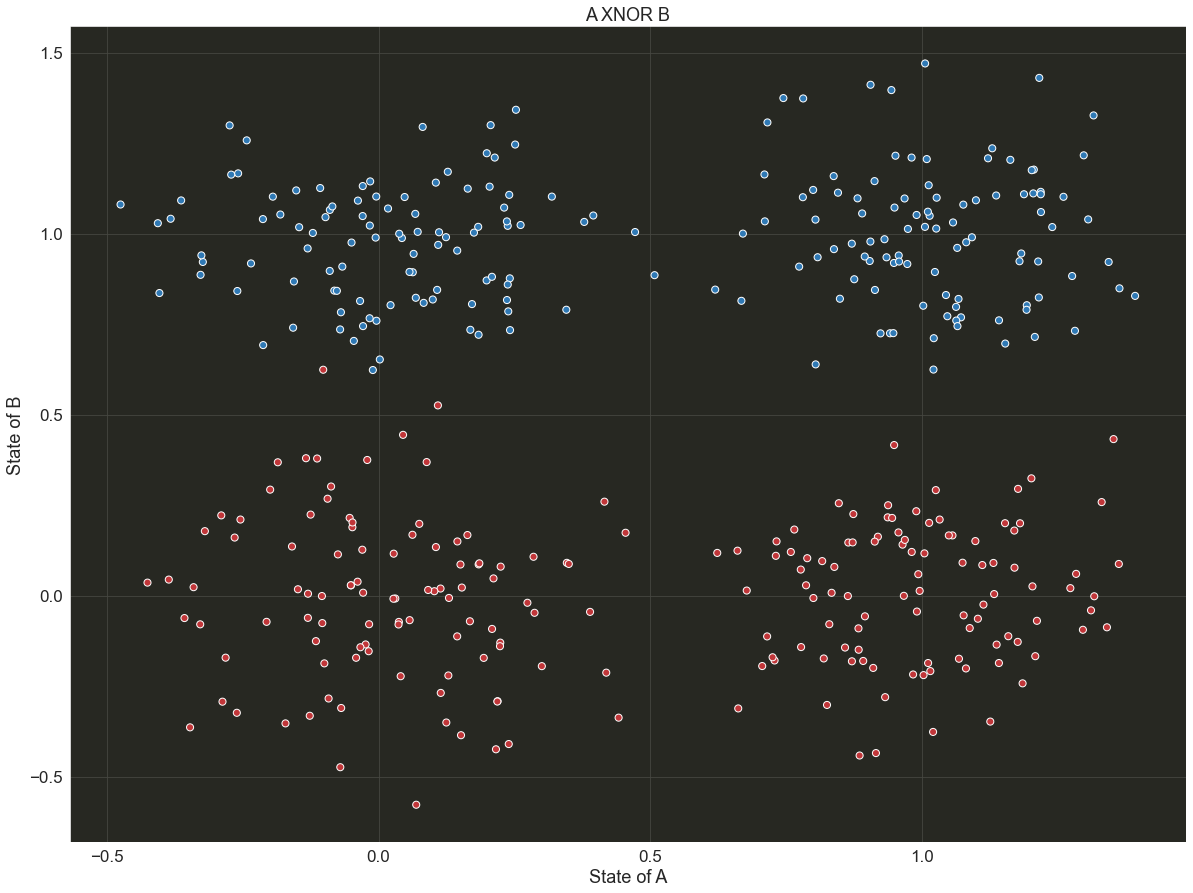

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.figure(figsize=(20, 15))
plt.grid(color="#474842")

plt.xticks(np.arange(-.5, 1.51, .5), fontsize=17)
plt.yticks(np.arange(-.5, 1.51, .5), fontsize=17)

ax = plt.gca()
ax.set_facecolor("#272822")

plt.title("A XNOR B", fontsize=18)
plt.xlabel("State of A", fontsize=18)
plt.ylabel("State of B", fontsize=18)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.savefig("xnor_problem.svg")
plt.show()

#### define non-linear and loss function as well as their derivatives

In [5]:
def sigmoid(X: np.ndarray) -> np.ndarray:
    """
    The sigmoid function will return 0 for every x << 0 and 1 for every x >> 0.
    :param X: data to transform via sigmoid function:
    :return: transformed data that lies between 0 and 1.
    """
    return 1 / (1 + np.exp(-X))

In [6]:
def sigmoid_derivative(X: np.ndarray) -> np.ndarray:
    """
    The derivative of the sigmoid function.
    :param X: the data points for that the slope of the sigmoid function should be returned.
    :return: the slope of the sigmoid function at every given X.
    """
    sig = sigmoid(X)
    return sig * (1 - sig)

In [7]:
def cross_entropy_loss(
    h: np.ndarray, y: np.ndarray
) -> np.ndarray:
    """
    Compute the cross entropy loss for the given hypothesis (h) in contrast to the true results (y).
    :param h: Hypothesis of the NN to compare with y.
    :param y: True results of the data.
    :return: Cost/Loss of the current hypothesis.
    """
    return -(1/y.size) * ((y.T @ np.log(h)) + ((1 - y.T) @ np.log(1 - h)))

In [8]:
def cross_entropy_derivative(
    h: np.ndarray, y: np.ndarray
) -> np.ndarray:
    """
    Compute the derivative of the cross entropy loss.
    :param h: Hypothesis of the NN to compare with y.
    :param y: True results of the data.
    :return: Derivative of the cross entropy loss with the current hypothesis.
    """
    return -(y // h) + ((1 - y) // (1 - h))

#### putting the initialization and the backprop algorithm together

In [9]:
def fit(X: np.ndarray, y: np.ndarray) -> Tuple[Dict, Dict]:
    """
    Create a simple ANN and train it on the given binary classification data.
    :param X: Input data.
    :param y: Output data.
    :return: Weights and biases as dictionaries.
    """
    weights = dict()
    biases = dict()

    weights[1] = 2 * np.random.random((2,3)) - 1
    biases[1] = np.zeros(3)
    weights[2] = 2 * np.random.random((3,1)) - 1
    biases[2] = np.zeros(1)

    a = dict()
    z = dict()
    da = dict()
    dz = dict()

    for iteration in range(1000):
        z[1] = X @ weights[1] + biases[1]
        a[1] = sigmoid(z[1])
        z[2] = a[1] @ weights[2] + biases[2]
        a[2] = sigmoid(z[2])
        h = a[2]

        loss = cross_entropy_loss(h=h, y=y)
        print(f"Loss ({iteration}): {loss[0][0]}")

        da[2] = cross_entropy_derivative(h=h, y=y)
        dz[2] = da[2] * sigmoid_derivative(z[2])
        da[1] = dz[2] @ weights[2].T
        dz[1] = da[1] * sigmoid_derivative(z[1])

        weights[1] -= (X.T @ dz[1]) * (1 / y.size)
        biases[1] -= np.mean(dz[1], axis=0)

        weights[2] -= (a[1].T @ dz[2]) * (1 / y.size)
        biases[2] -= np.mean(dz[2], axis=0)

    return weights, biases

#### run the training

In [10]:
w, b = fit(X=X_train, y=y_train)

Loss (0): 0.7271440280548405
Loss (1): 0.7081552217127418
Loss (2): 0.702555305907612
Loss (3): 0.7029041269635122
Loss (4): 0.6998668663488999
Loss (5): 0.6983222282219649
Loss (6): 0.6977074236134546
Loss (7): 0.6942891719029589
Loss (8): 0.6922376124821973
Loss (9): 0.6965543352995118
Loss (10): 0.6889031707025359
Loss (11): 0.6914866179137527
Loss (12): 0.685780057738437
Loss (13): 0.6866160718898879
Loss (14): 0.6827655617873
Loss (15): 0.6818364467110848
Loss (16): 0.6797578790498306
Loss (17): 0.6770420926297439
Loss (18): 0.6746498321260529
Loss (19): 0.6750877125405357
Loss (20): 0.6705904423603455
Loss (21): 0.6691576430692228
Loss (22): 0.6655103704309647
Loss (23): 0.6644100145847598
Loss (24): 0.6599339198167823
Loss (25): 0.6585335239390053
Loss (26): 0.6542310308019355
Loss (27): 0.6519675779487701
Loss (28): 0.6495400891288313
Loss (29): 0.6470398842453605
Loss (30): 0.6444169481084981
Loss (31): 0.6416957194858265
Loss (32): 0.6388462723581357
Loss (33): 0.635890335970

Loss (277): 0.03452924634555365
Loss (278): 0.0343765079998706
Loss (279): 0.03422534239286361
Loss (280): 0.034075725687067376
Loss (281): 0.033927634515250445
Loss (282): 0.033781045969078036
Loss (283): 0.033635937588096174
Loss (284): 0.03349228734902674
Loss (285): 0.03335007365536335
Loss (286): 0.03320927532725849
Loss (287): 0.033069871591692425
Loss (288): 0.03293184207291514
Loss (289): 0.03279516678315237
Loss (290): 0.032659826113567554
Loss (291): 0.032525800825471636
Loss (292): 0.03239307204177273
Loss (293): 0.03226162123865852
Loss (294): 0.03213143023750376
Loss (295): 0.03200248119699616
Loss (296): 0.03187475660547378
Loss (297): 0.031748239273467475
Loss (298): 0.031622912326442085
Loss (299): 0.031498759197730285
Loss (300): 0.03137576362165331
Loss (301): 0.03125390962682271
Loss (302): 0.031133181529617894
Loss (303): 0.031013563927834116
Loss (304): 0.030895041694495584
Loss (305): 0.030777599971829092
Loss (306): 0.030661224165393162
Loss (307): 0.030545899938

Loss (541): 0.01764378517148439
Loss (542): 0.01761698724389526
Loss (543): 0.01759030246092936
Loss (544): 0.017563730079621278
Loss (545): 0.01753726936354349
Loss (546): 0.017510919582737944
Loss (547): 0.017484680013648366
Loss (548): 0.0174585499390532
Loss (549): 0.017432528647999303
Loss (550): 0.017406615435736256
Loss (551): 0.01738080960365142
Loss (552): 0.017355110459205694
Loss (553): 0.01732951731586984
Loss (554): 0.017304029493061673
Loss (555): 0.01727864631608384
Loss (556): 0.01725336711606223
Loss (557): 0.017228191229885195
Loss (558): 0.017203118000143305
Loss (559): 0.017178146775069927
Loss (560): 0.017153276908482343
Loss (561): 0.0171285077597236
Loss (562): 0.017103838693605
Loss (563): 0.017079269080349253
Loss (564): 0.01705479829553427
Loss (565): 0.017030425720037615
Loss (566): 0.017006150739981584
Loss (567): 0.016981972746678953
Loss (568): 0.016957891136579237
Loss (569): 0.016933905311215792
Loss (570): 0.01691001467715328
Loss (571): 0.0168862186459

Loss (825): 0.012857746535414721
Loss (826): 0.012848220760853115
Loss (827): 0.012837352611198716
Loss (828): 0.0128265282294679
Loss (829): 0.012817086451454808
Loss (830): 0.01280626986013715
Loss (831): 0.012795498877258218
Loss (832): 0.012786137042844866
Loss (833): 0.012775374330283053
Loss (834): 0.01276607745158746
Loss (835): 0.012755324226432259
Loss (836): 0.012744621201567835
Loss (837): 0.012735397074311622
Loss (838): 0.012724704106630869
Loss (839): 0.012714062447877076
Loss (840): 0.012704908967816255
Loss (841): 0.012694277900159721
Loss (842): 0.012685181572494137
Loss (843): 0.012674562750747234
Loss (844): 0.012663998877993597
Loss (845): 0.012654968944603412
Loss (846): 0.012644417649249722
Loss (847): 0.01263544093486154
Loss (848): 0.012624903998259045
Loss (849): 0.012615978204041083
Loss (850): 0.012605457452791843
Loss (851): 0.012594996947941937
Loss (852): 0.012586133158318935
Loss (853): 0.01257568863858051
Loss (854): 0.012566873457373923
Loss (855): 0.01

#### function to make predictions on trained neural network

In [11]:
def predict(w: Dict, b: Dict, X: np.ndarray) -> np.ndarray:
    """
    Use the given weights (w) and biases (b) to make a prediction for the given input data (X).
    :param w: Dictionary of weight matrices.
    :param b: Dictionary of bias vectors.
    :param X: Input data to make predictions on.
    :return: An numpy array of predictions for every sample in X.
    """
    z = dict()
    a = dict()
    
    z[1] = X @ w[1] + b[1]
    a[1] = sigmoid(z[1])
    z[2] = a[1] @ w[2] + b[2]
    a[2] = sigmoid(z[2])
    
    return a[2]

#### extra code
Create a grid over X- and Y-axis and make a prediction for each spot. visualize the result

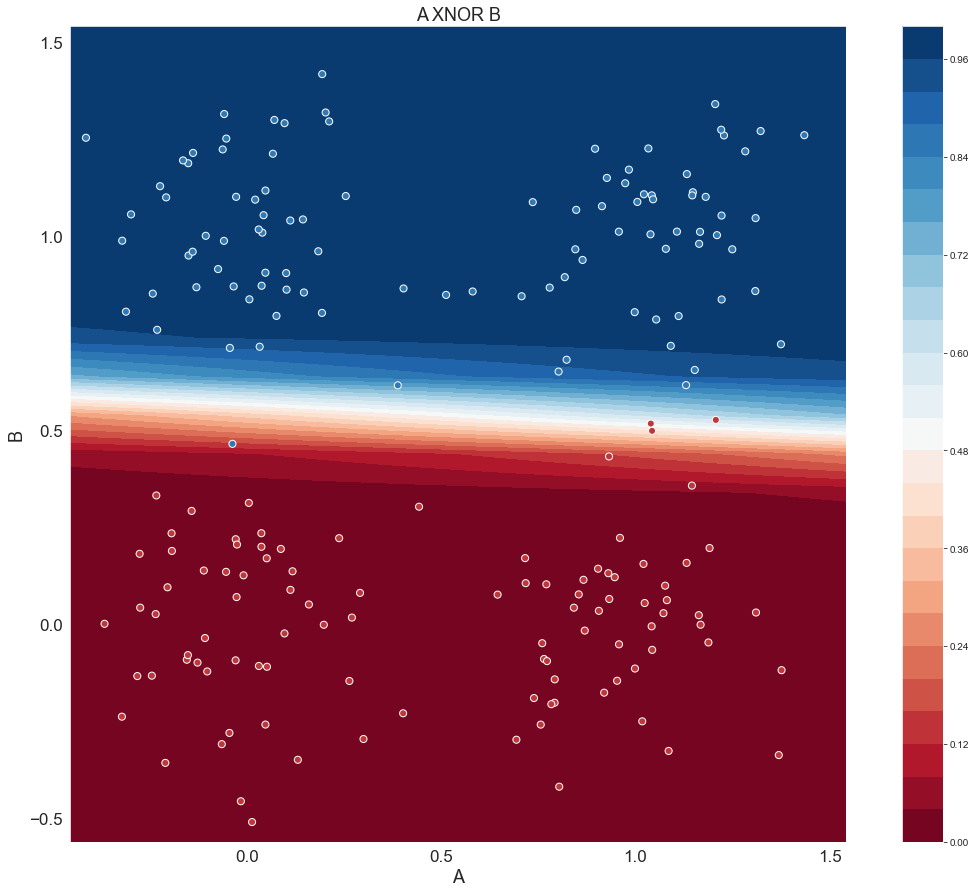

In [12]:
X = X_test

xx, yy = np.mgrid[1.1*min(X[:,0]):1.1*max(X[:,0]):0.1, 1.1*min(X[:,1]):1.1*max(X[:,1]):0.1]

grid = np.c_[xx.ravel(), yy.ravel()]

# Find the probabilities for each combination of features

probs = predict(w, b, grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(20, 15))

# Create contour lines for each set of probabilities

contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

plt.xticks(np.arange(-.5, 1.51, .5), fontsize=17)
plt.yticks(np.arange(-.5, 1.51, .5), fontsize=17)

plt.title("A XNOR B", fontsize=18)
plt.xlabel("A", fontsize=18)
plt.ylabel("B", fontsize=18)

ax_c = f.colorbar(contour)

ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:,0], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal")

plt.savefig("xnor_decision_boundaries.svg")
plt.show()